In [ ]:
"""
To repeat the graph exploration on version 4

Same as 
http://at-compute004.ad.bcm.edu:8888/notebooks/neuron_mesh_tools/Graph_Analysis/Graph_Exploration_Version_3.ipynb


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/meshAfterParty")
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/graph/")

In [3]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-06-03 16:22:28,858 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-03 16:22:28,860 - settings - Setting database.user to celiib
INFO - 2021-06-03 16:22:28,861 - settings - Setting database.password to newceliipass
INFO - 2021-06-03 16:22:28,865 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-06-03 16:22:28,866 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-03 16:22:28,880 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-06-03 16:22:29,410 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-03 16:22:29,417 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-03 16:22:29,418 - settings - Setting database.user to celiib
INFO - 2021-06-03 16:22:29,419 - settings - Setting database.password to newceliipass
INFO - 2021-06-03 16:22:29,420 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-03 16:22:29,420 - settings - Setting database.user to celiib
INFO - 2021-06-03 16:22:29,421 - settings - Setting database.password to newceliipass
INFO - 2021-06-03 16:22:29,423 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-03 16:22:29,964 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-03 16:22:30,015 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-03 16:22:30,016 - settings - Setting database.user to celiib
INFO - 2021-06-03 16:22:30,017 - settings - Setting database.pa

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import networkx_utils as xu
import numpy_utils as nu
from importlib import reload
import system_utils as su
from tqdm_utils import tqdm
from pathlib import Path

In [5]:
import graph_visualizations as gviz
import graph_analysis as ga

# Loading the Initial Graph and The v4 Graph

In [6]:
current_version = 5

In [7]:
G_orig_path = Path("/neuron_mesh_tools/Graph_Analysis/G_orig_multi_di.pbz2")
G_orig_multi_di = su.decompress_pickle(G_orig_path)

In [8]:
v4_graph_path = Path(f"/neuron_mesh_tools/Graph_Analysis/G_proof_v{current_version}.pbz2")
G_proof_multi_di_with_attributes = su.decompress_pickle(v4_graph_path)

# Original Graph Stats



---- Working on graph type multi_di ----- 


Stats for Original Graph (Multi-Edge,Directional)
Number of Nodes = 91,565
Number of Edges = 17,133,898
Original Graph (Multi-Edge,Directional) in_and_out degree distribution mean = 339.1879109179317,
Original Graph (Multi-Edge,Directional) in_and_out degree distribution median = 201.0


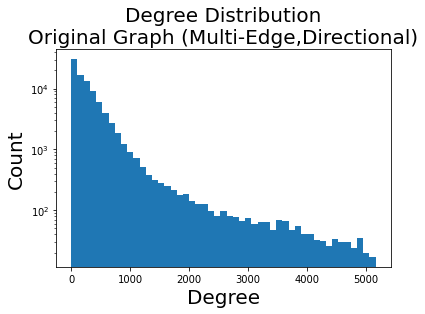

Original Graph (Multi-Edge,Directional) in degree distribution mean = 175.91157649796392,
Original Graph (Multi-Edge,Directional) in degree distribution median = 123.0


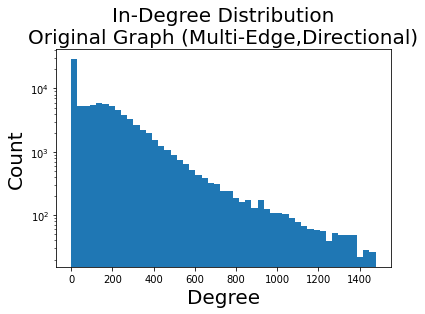

Original Graph (Multi-Edge,Directional) out degree distribution mean = 158.71759579395655,
Original Graph (Multi-Edge,Directional) out degree distribution median = 57.0


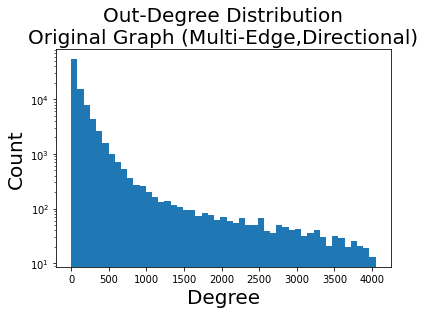

Cant perform connected component analysis


---- Working on graph type multi ----- 


Stats for Original Graph (Multi-Edge,Undirectional)
Number of Nodes = 91,565
Number of Edges = 16,303,527
Original Graph (Multi-Edge,Undirectional) in_and_out degree distribution mean = 324.7715653023368,
Original Graph (Multi-Edge,Undirectional) in_and_out degree distribution median = 198.0


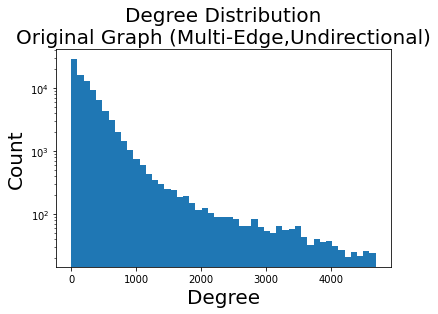

Original Graph (Multi-Edge,Undirectional) in distribution can't be graphed
Original Graph (Multi-Edge,Undirectional) out distribution can't be graphed
Working on Largest component
Stats for Original Graph (Multi-Edge,Undirectional)
Largest Component
Number of Nodes = 91,235
Number of Edges = 16,303,198
Original Graph (Multi-Edge,Undirectional)
Largest Component in_and_out degree distribution mean = 325.9930269448545,
Original Graph (Multi-Edge,Undirectional)
Largest Component in_and_out degree distribution median = 199.0


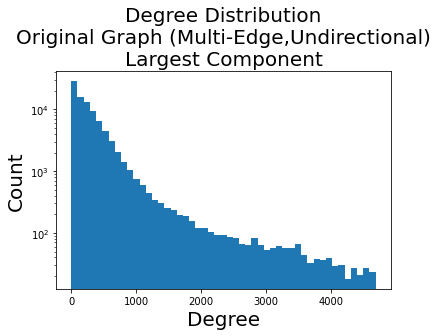

Original Graph (Multi-Edge,Undirectional)
Largest Component in distribution can't be graphed
Original Graph (Multi-Edge,Undirectional)
Largest Component out distribution can't be graphed


---- Working on graph type di ----- 


Stats for Original Graph (Unique-Edge,Directional)
Number of Nodes = 91,565
Number of Edges = 11,917,994
Original Graph (Unique-Edge,Directional) in_and_out degree distribution mean = 243.64163017111747,
Original Graph (Unique-Edge,Directional) in_and_out degree distribution median = 160.0


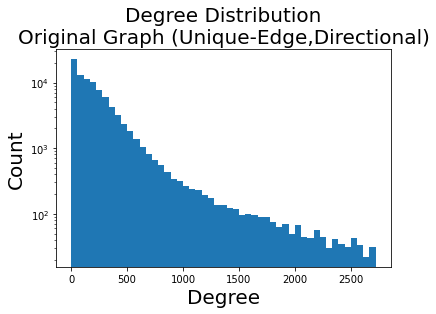

Original Graph (Unique-Edge,Directional) in degree distribution mean = 124.54332506421373,
Original Graph (Unique-Edge,Directional) in degree distribution median = 97.0


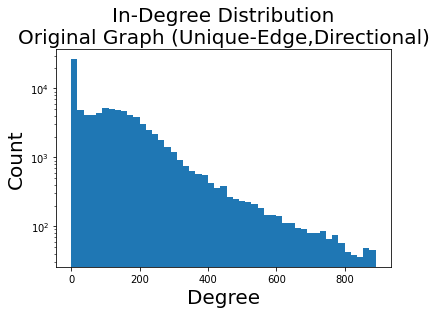

Original Graph (Unique-Edge,Directional) out degree distribution mean = 117.05349753586442,
Original Graph (Unique-Edge,Directional) out degree distribution median = 50.0


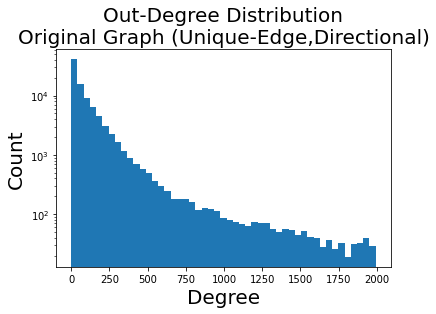

Cant perform connected component analysis


---- Working on graph type simple ----- 


Stats for Original Graph (Unique-Edge,Undirectional)
Number of Nodes = 91,565
Number of Edges = 11,482,430
Original Graph (Unique-Edge,Undirectional) in_and_out degree distribution mean = 235.5293555928743,
Original Graph (Unique-Edge,Undirectional) in_and_out degree distribution median = 158.0


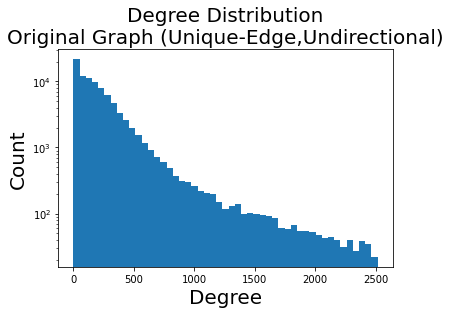

Original Graph (Unique-Edge,Undirectional) in distribution can't be graphed
Original Graph (Unique-Edge,Undirectional) out distribution can't be graphed
Working on Largest component
Stats for Original Graph (Unique-Edge,Undirectional)
Largest Component
Number of Nodes = 91,235
Number of Edges = 11,482,236
Original Graph (Unique-Edge,Undirectional)
Largest Component in_and_out degree distribution mean = 236.40644208949305,
Original Graph (Unique-Edge,Undirectional)
Largest Component in_and_out degree distribution median = 159.0


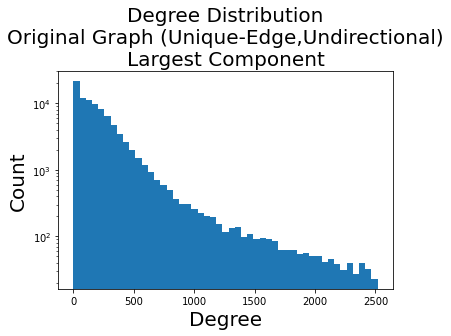

Original Graph (Unique-Edge,Undirectional)
Largest Component in distribution can't be graphed
Original Graph (Unique-Edge,Undirectional)
Largest Component out distribution can't be graphed


In [9]:
original_stats = ga.graph_analysis_different_graph_types(G = G_orig_multi_di,
                                                           graph_title="Original")

# Proofread Graph Stats



---- Working on graph type multi_di ----- 


Stats for Proofread Graph (Multi-Edge,Directional)
Number of Nodes = 65,939
Number of Edges = 1,401,497
Proofread Graph (Multi-Edge,Directional) in_and_out degree distribution mean = 35.91405142587145,
Proofread Graph (Multi-Edge,Directional) in_and_out degree distribution median = 20.0


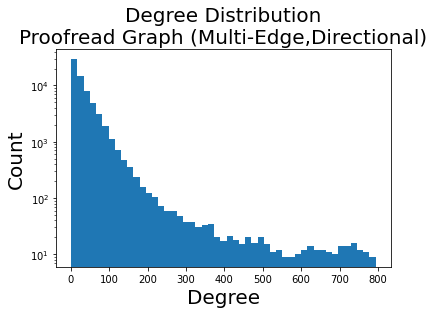

Proofread Graph (Multi-Edge,Directional) in degree distribution mean = 20.274607844631777,
Proofread Graph (Multi-Edge,Directional) in degree distribution median = 14.0


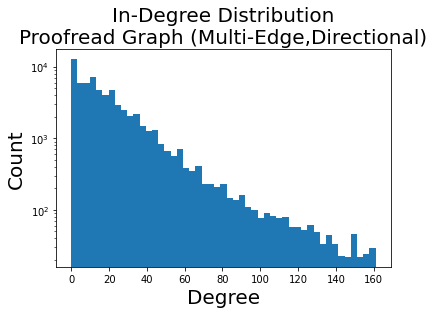

Proofread Graph (Multi-Edge,Directional) out degree distribution mean = 15.107226142754804,
Proofread Graph (Multi-Edge,Directional) out degree distribution median = 1.0


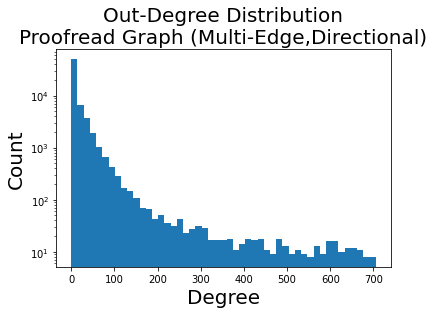

Cant perform connected component analysis


---- Working on graph type multi ----- 


Stats for Proofread Graph (Multi-Edge,Undirectional)
Number of Nodes = 65,939
Number of Edges = 1,380,923
Proofread Graph (Multi-Edge,Undirectional) in_and_out degree distribution mean = 35.48728070843939,
Proofread Graph (Multi-Edge,Undirectional) in_and_out degree distribution median = 20.0


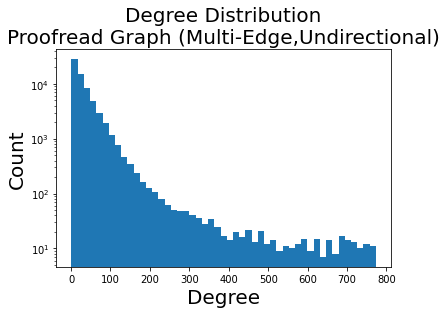

Proofread Graph (Multi-Edge,Undirectional) in distribution can't be graphed
Proofread Graph (Multi-Edge,Undirectional) out distribution can't be graphed
Working on Largest component
Stats for Proofread Graph (Multi-Edge,Undirectional)
Largest Component
Number of Nodes = 65,706
Number of Edges = 1,380,768
Proofread Graph (Multi-Edge,Undirectional)
Largest Component in_and_out degree distribution mean = 35.620325190816345,
Proofread Graph (Multi-Edge,Undirectional)
Largest Component in_and_out degree distribution median = 21.0


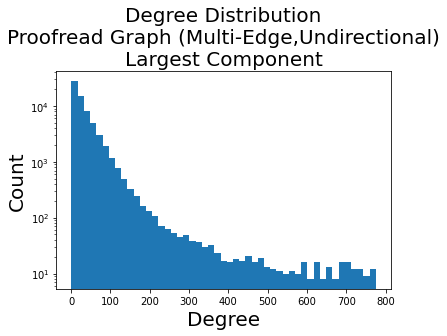

Proofread Graph (Multi-Edge,Undirectional)
Largest Component in distribution can't be graphed
Proofread Graph (Multi-Edge,Undirectional)
Largest Component out distribution can't be graphed


---- Working on graph type di ----- 


Stats for Proofread Graph (Unique-Edge,Directional)
Number of Nodes = 65,939
Number of Edges = 1,034,787
Proofread Graph (Unique-Edge,Directional) in_and_out degree distribution mean = 27.65990946364066,
Proofread Graph (Unique-Edge,Directional) in_and_out degree distribution median = 16.0


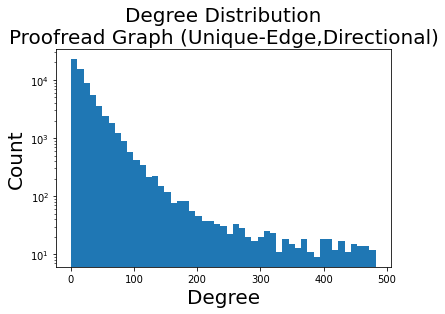

Proofread Graph (Unique-Edge,Directional) in degree distribution mean = 14.970047558075727,
Proofread Graph (Unique-Edge,Directional) in degree distribution median = 11.0


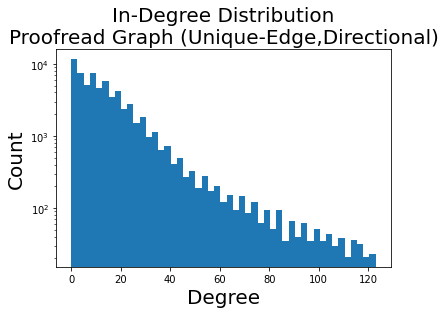

Proofread Graph (Unique-Edge,Directional) out degree distribution mean = 12.302025698477296,
Proofread Graph (Unique-Edge,Directional) out degree distribution median = 1.0


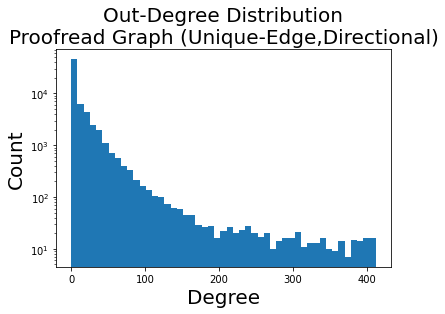

Cant perform connected component analysis


---- Working on graph type simple ----- 


Stats for Proofread Graph (Unique-Edge,Undirectional)
Number of Nodes = 65,939
Number of Edges = 1,021,836
Proofread Graph (Unique-Edge,Undirectional) in_and_out degree distribution mean = 27.371073208651516,
Proofread Graph (Unique-Edge,Undirectional) in_and_out degree distribution median = 16.0


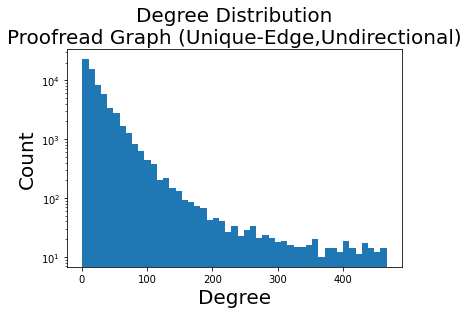

Proofread Graph (Unique-Edge,Undirectional) in distribution can't be graphed
Proofread Graph (Unique-Edge,Undirectional) out distribution can't be graphed
Working on Largest component
Stats for Proofread Graph (Unique-Edge,Undirectional)
Largest Component
Number of Nodes = 65,706
Number of Edges = 1,021,713
Proofread Graph (Unique-Edge,Undirectional)
Largest Component in_and_out degree distribution mean = 27.46486370728424,
Proofread Graph (Unique-Edge,Undirectional)
Largest Component in_and_out degree distribution median = 16.0


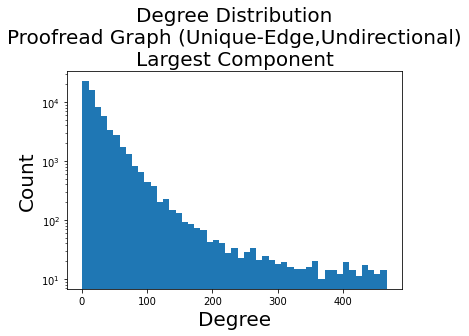

Proofread Graph (Unique-Edge,Undirectional)
Largest Component in distribution can't be graphed
Proofread Graph (Unique-Edge,Undirectional)
Largest Component out distribution can't be graphed


In [10]:
proofread_stats = ga.graph_analysis_different_graph_types(G = G_proof_multi_di_with_attributes,
                                                           graph_title="Proofread")

# D) Getting Excitatory, Densely Spined Subgraph

In [11]:
"""
The number are a lot different because using the densely spined feature
instead of exctoatory label

"""

'\nThe number are a lot different because using the densely spined feature\ninstead of exctoatory label\n\n'

In [12]:
import networkx_utils as xu
excitatory_nodes = xu.get_nodes_with_attributes_dict(G_proof_multi_di_with_attributes,
                                 dict(spine_category="densely_spined")
                                #dict(cell_type_predicted="excitatory")
                                                    )
G_proof_multi_di_exc = G_proof_multi_di_with_attributes.subgraph(excitatory_nodes)
len(G_proof_multi_di_exc.nodes())

49986



---- Working on graph type multi_di ----- 


Stats for Proofread Graph (Multi-Edge,Directional)
Dense Neurons
Number of Nodes = 49,986
Number of Edges = 312,200
Proofread Graph (Multi-Edge,Directional)
Dense Neurons in_and_out degree distribution mean = 11.65617710930588,
Proofread Graph (Multi-Edge,Directional)
Dense Neurons in_and_out degree distribution median = 6.0


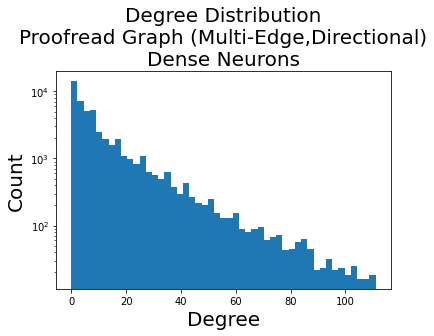

Proofread Graph (Multi-Edge,Directional)
Dense Neurons in degree distribution mean = 5.740333380250538,
Proofread Graph (Multi-Edge,Directional)
Dense Neurons in degree distribution median = 4.0


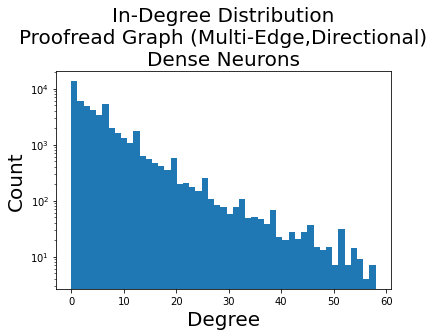

Proofread Graph (Multi-Edge,Directional)
Dense Neurons out degree distribution mean = 5.5509600884688854,
Proofread Graph (Multi-Edge,Directional)
Dense Neurons out degree distribution median = 0.0


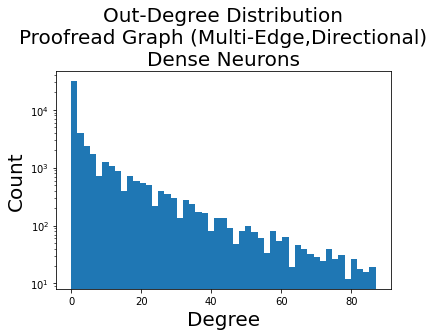

Cant perform connected component analysis


---- Working on graph type multi ----- 


Stats for Proofread Graph (Multi-Edge,Undirectional)
Dense Neurons
Number of Nodes = 49,986
Number of Edges = 311,716
Proofread Graph (Multi-Edge,Undirectional)
Dense Neurons in_and_out degree distribution mean = 11.647451492912436,
Proofread Graph (Multi-Edge,Undirectional)
Dense Neurons in_and_out degree distribution median = 6.0


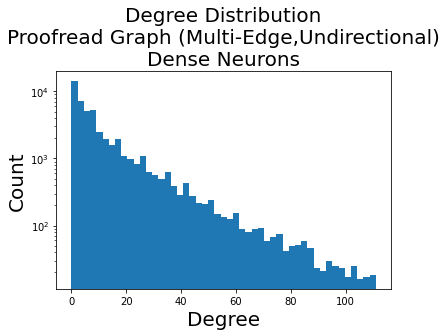

Proofread Graph (Multi-Edge,Undirectional)
Dense Neurons in distribution can't be graphed
Proofread Graph (Multi-Edge,Undirectional)
Dense Neurons out distribution can't be graphed
Working on Largest component
Stats for Proofread Graph (Multi-Edge,Undirectional)
Dense Neurons
Largest Component
Number of Nodes = 45,141
Number of Edges = 311,544
Proofread Graph (Multi-Edge,Undirectional)
Dense Neurons
Largest Component in_and_out degree distribution mean = 12.943666362361114,
Proofread Graph (Multi-Edge,Undirectional)
Dense Neurons
Largest Component in_and_out degree distribution median = 7.0


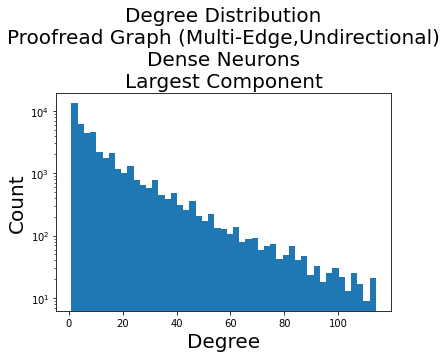

Proofread Graph (Multi-Edge,Undirectional)
Dense Neurons
Largest Component in distribution can't be graphed
Proofread Graph (Multi-Edge,Undirectional)
Dense Neurons
Largest Component out distribution can't be graphed


---- Working on graph type di ----- 


Stats for Proofread Graph (Unique-Edge,Directional)
Dense Neurons
Number of Nodes = 49,986
Number of Edges = 283,199
Proofread Graph (Unique-Edge,Directional)
Dense Neurons in_and_out degree distribution mean = 10.65180672015443,
Proofread Graph (Unique-Edge,Directional)
Dense Neurons in_and_out degree distribution median = 5.0


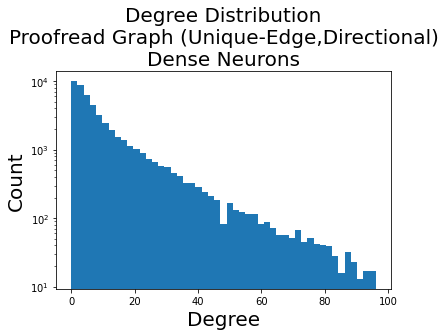

Proofread Graph (Unique-Edge,Directional)
Dense Neurons in degree distribution mean = 5.262702833128908,
Proofread Graph (Unique-Edge,Directional)
Dense Neurons in degree distribution median = 3.0


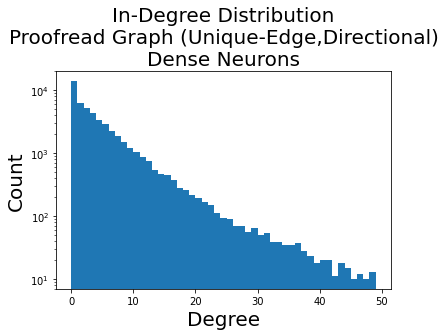

Proofread Graph (Unique-Edge,Directional)
Dense Neurons out degree distribution mean = 5.079122514225967,
Proofread Graph (Unique-Edge,Directional)
Dense Neurons out degree distribution median = 0.0


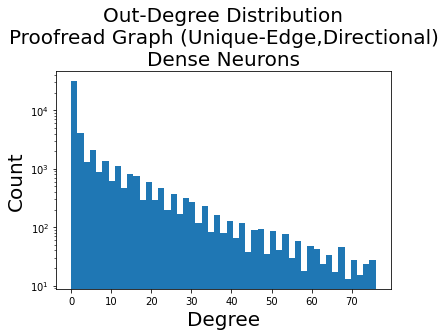

Cant perform connected component analysis


---- Working on graph type simple ----- 


Stats for Proofread Graph (Unique-Edge,Undirectional)
Dense Neurons
Number of Nodes = 49,986
Number of Edges = 282,794
Proofread Graph (Unique-Edge,Undirectional)
Dense Neurons in_and_out degree distribution mean = 10.645923393988138,
Proofread Graph (Unique-Edge,Undirectional)
Dense Neurons in_and_out degree distribution median = 5.0


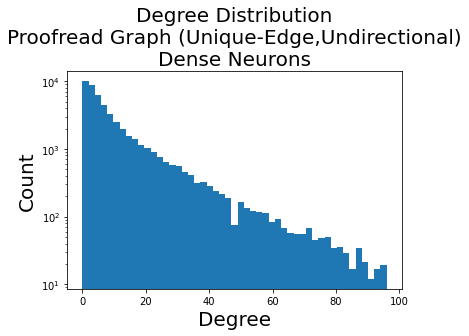

Proofread Graph (Unique-Edge,Undirectional)
Dense Neurons in distribution can't be graphed
Proofread Graph (Unique-Edge,Undirectional)
Dense Neurons out distribution can't be graphed
Working on Largest component
Stats for Proofread Graph (Unique-Edge,Undirectional)
Dense Neurons
Largest Component
Number of Nodes = 45,141
Number of Edges = 282,628
Proofread Graph (Unique-Edge,Undirectional)
Dense Neurons
Largest Component in_and_out degree distribution mean = 11.82964463840399,
Proofread Graph (Unique-Edge,Undirectional)
Dense Neurons
Largest Component in_and_out degree distribution median = 6.0


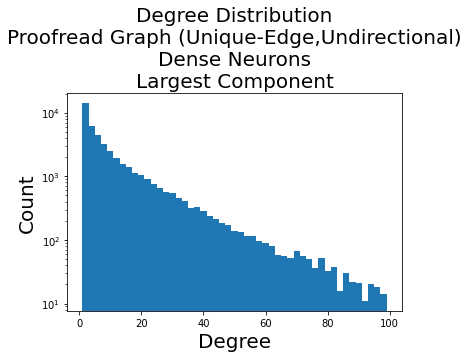

Proofread Graph (Unique-Edge,Undirectional)
Dense Neurons
Largest Component in distribution can't be graphed
Proofread Graph (Unique-Edge,Undirectional)
Dense Neurons
Largest Component out distribution can't be graphed


In [13]:
excitatory_stats = ga.graph_analysis_different_graph_types(G = G_proof_multi_di_exc,
                                                           graph_title="Proofread",
                                                            title_append = "Dense Neurons")

# E) Long Axon Excitatory Subgraph

In [14]:
import networkx_utils as xu
G = G_proof_multi_di_with_attributes

axon_threshold = 1000
long_axon_exciatory_nodes = [nod for nod in G.nodes() if 
              #((G.nodes[nod]["cell_type_predicted"] == "excitatory") and 
               ((G.nodes[nod]["spine_category"] == "densely_spined") and 
            (G.nodes[nod]["axon_length"]>axon_threshold))]

G_proof_multi_di_exc_axon = G.subgraph(long_axon_exciatory_nodes)
len(G_proof_multi_di_exc_axon.nodes())

8300



---- Working on graph type multi_di ----- 


Stats for Proofread Graph (Multi-Edge,Directional)
Excitatory Neurons
Axon Length > 1000
Number of Nodes = 8,300
Number of Edges = 60,915
Proofread Graph (Multi-Edge,Directional)
Excitatory Neurons
Axon Length > 1000 in_and_out degree distribution mean = 14.145434729958827,
Proofread Graph (Multi-Edge,Directional)
Excitatory Neurons
Axon Length > 1000 in_and_out degree distribution median = 12.0


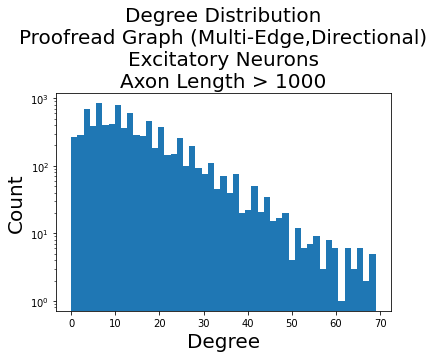

Proofread Graph (Multi-Edge,Directional)
Excitatory Neurons
Axon Length > 1000 in degree distribution mean = 7.031011508176863,
Proofread Graph (Multi-Edge,Directional)
Excitatory Neurons
Axon Length > 1000 in degree distribution median = 5.0


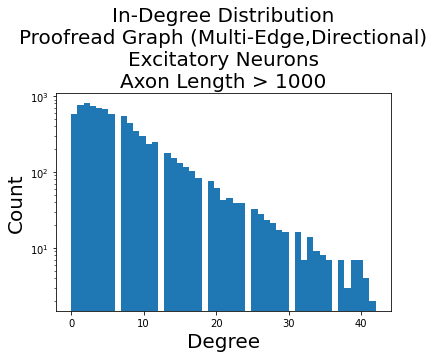

Proofread Graph (Multi-Edge,Directional)
Excitatory Neurons
Axon Length > 1000 out degree distribution mean = 6.883963178294573,
Proofread Graph (Multi-Edge,Directional)
Excitatory Neurons
Axon Length > 1000 out degree distribution median = 5.0


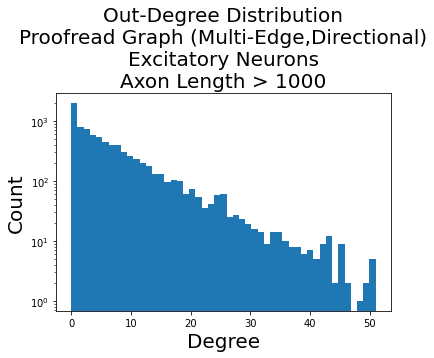

Cant perform connected component analysis


---- Working on graph type multi ----- 


Stats for Proofread Graph (Multi-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000
Number of Nodes = 8,300
Number of Edges = 60,620
Proofread Graph (Multi-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000 in_and_out degree distribution mean = 14.081143272374955,
Proofread Graph (Multi-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000 in_and_out degree distribution median = 12.0


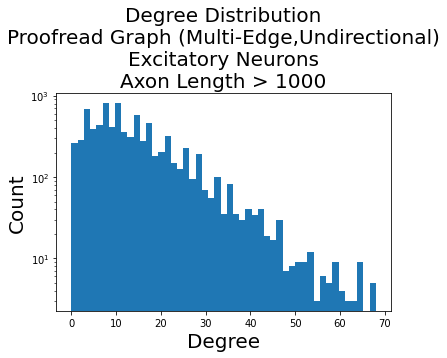

Proofread Graph (Multi-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000 in distribution can't be graphed
Proofread Graph (Multi-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000 out distribution can't be graphed
Working on Largest component
Stats for Proofread Graph (Multi-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000
Largest Component
Number of Nodes = 8,216
Number of Edges = 60,619
Proofread Graph (Multi-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000
Largest Component in_and_out degree distribution mean = 14.225620947020678,
Proofread Graph (Multi-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000
Largest Component in_and_out degree distribution median = 12.0


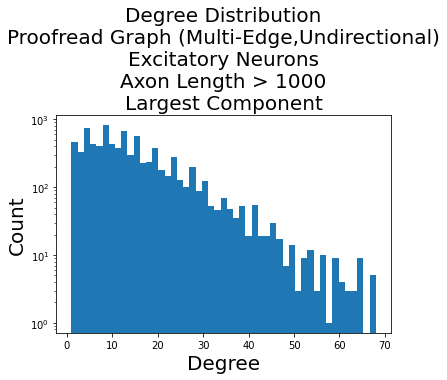

Proofread Graph (Multi-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000
Largest Component in distribution can't be graphed
Proofread Graph (Multi-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000
Largest Component out distribution can't be graphed


---- Working on graph type di ----- 


Stats for Proofread Graph (Unique-Edge,Directional)
Excitatory Neurons
Axon Length > 1000
Number of Nodes = 8,300
Number of Edges = 54,933
Proofread Graph (Unique-Edge,Directional)
Excitatory Neurons
Axon Length > 1000 in_and_out degree distribution mean = 12.815891472868216,
Proofread Graph (Unique-Edge,Directional)
Excitatory Neurons
Axon Length > 1000 in_and_out degree distribution median = 11.0


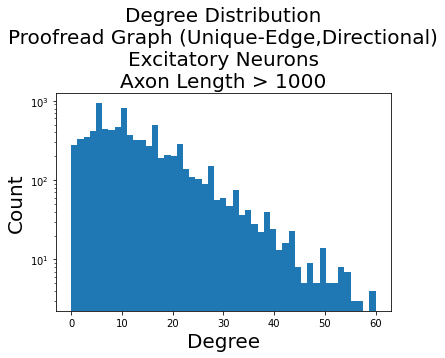

Proofread Graph (Unique-Edge,Directional)
Excitatory Neurons
Axon Length > 1000 in degree distribution mean = 6.362238101005207,
Proofread Graph (Unique-Edge,Directional)
Excitatory Neurons
Axon Length > 1000 in degree distribution median = 5.0


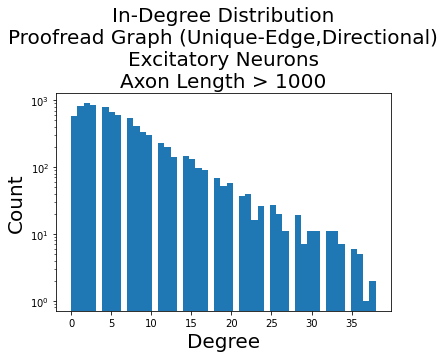

Proofread Graph (Unique-Edge,Directional)
Excitatory Neurons
Axon Length > 1000 out degree distribution mean = 6.26780523255814,
Proofread Graph (Unique-Edge,Directional)
Excitatory Neurons
Axon Length > 1000 out degree distribution median = 4.0


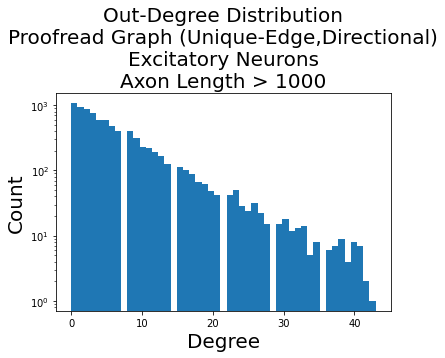

Cant perform connected component analysis


---- Working on graph type simple ----- 


Stats for Proofread Graph (Unique-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000
Number of Nodes = 8,300
Number of Edges = 54,693
Proofread Graph (Unique-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000 in_and_out degree distribution mean = 12.77219329054136,
Proofread Graph (Unique-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000 in_and_out degree distribution median = 11.0


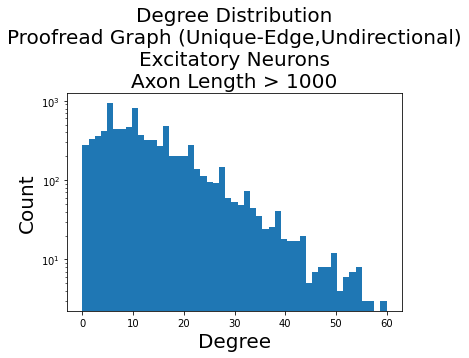

Proofread Graph (Unique-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000 in distribution can't be graphed
Proofread Graph (Unique-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000 out distribution can't be graphed
Working on Largest component
Stats for Proofread Graph (Unique-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000
Largest Component
Number of Nodes = 8,216
Number of Edges = 54,692
Proofread Graph (Unique-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000
Largest Component in_and_out degree distribution mean = 12.903217912639178,
Proofread Graph (Unique-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000
Largest Component in_and_out degree distribution median = 11.0


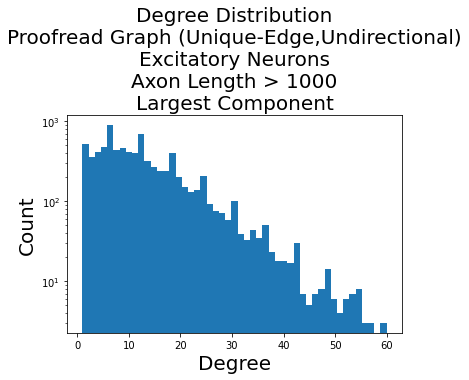

Proofread Graph (Unique-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000
Largest Component in distribution can't be graphed
Proofread Graph (Unique-Edge,Undirectional)
Excitatory Neurons
Axon Length > 1000
Largest Component out distribution can't be graphed


In [15]:
axon_stats = ga.graph_analysis_different_graph_types(G = G_proof_multi_di_exc_axon,
                                                           graph_title="Proofread",
                                                            title_append = f"Excitatory Neurons\nAxon Length > {axon_threshold}")

# Assembling the Table that will compile the results

<AxesSubplot:>

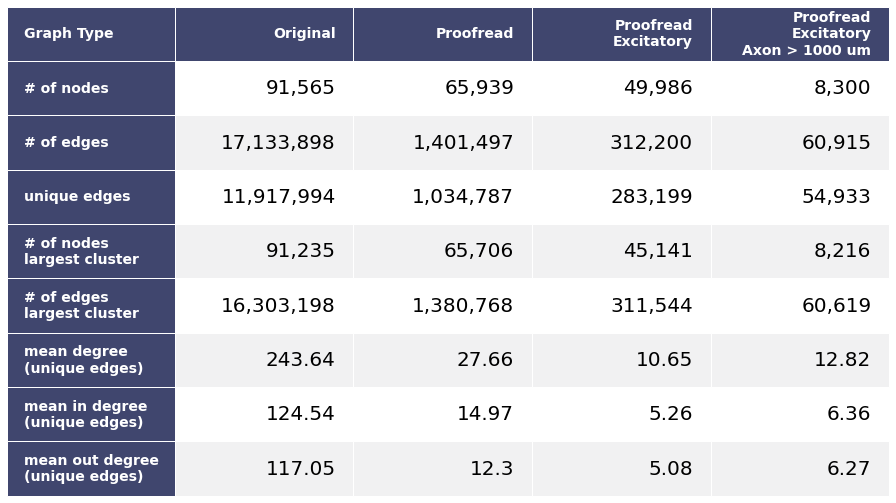

In [16]:
gviz.graph_stats_dicts_to_plt_table(stats_list = [original_stats,proofread_stats,excitatory_stats,axon_stats],
graph_names_list = ["Original","Proofread","Proofread\nExcitatory",f"Proofread\nExcitatory\nAxon > {axon_threshold} um"])

In [19]:
print("hi")

INFO - 2021-06-07 21:04:10,943 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-07 21:04:10,945 - settings - Setting database.user to celiib
INFO - 2021-06-07 21:04:10,946 - settings - Setting database.password to newceliipass
INFO - 2021-06-07 21:04:10,947 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-07 21:04:10,948 - settings - Setting database.user to celiib
INFO - 2021-06-07 21:04:10,948 - settings - Setting database.password to newceliipass
INFO - 2021-06-07 21:04:10,954 - settings - Setting enable_python_native_blobs to True
/usr/local/lib/python3.6/dist-packages/datajoint/connection.py:218: UserWarning: MySQL server has gone away. Reconnecting to the server.
  warnings.warn("MySQL server has gone away. Reconnecting to the server.")
INFO - 2021-06-07 21:04:11,769 - settings - Setting enable_python_native_blobs to True


hi


Text(0, 0.5, 'Counts')

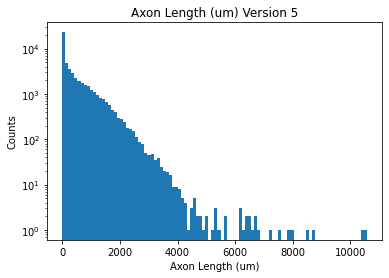

In [20]:
axon_lengths = (du.proofreading_neurons_table() & "spine_category='densely_spined'").fetch("axon_length")

import matplotlib.pyplot as plt
_ = plt.hist(axon_lengths,bins=100)
plt.yscale("log")
plt.title("Axon Length (um) Version 5")
plt.xlabel("Axon Length (um)")
plt.ylabel("Counts")

# Looking at connected components

In [18]:
G_largest = G.subgraph(conn_comp[0])
node_names_largest_comp = np.array(G_largest.nodes())
node_names_largest_comp.shape

NameError: name 'conn_comp' is not defined

# Plotting Degree Distribution

In [ ]:
gu.plot_degree_distribution(G,logscale=True,n_bins = 100,percentile=99,
                           font_size=20)

# Looking at the Number of long Axons

In [ ]:
axon_lengths = (du.proofreading_neurons_table() & "spine_category='densely_spined'").fetch("axon_length")

import matplotlib.pyplot as plt
_ = plt.hist(axon_lengths,bins=100)
plt.yscale("log")